In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# If you've already uploaded seeds.csv to Colab via the file uploader:
df = pd.read_excel('seeds_labeled.xlsx')
df

,Customer Name,Gender,Comment,Website,Seed Type,Date,Label
0,"Natraj B, Bangalore",1,good quality,Bigbasket,Pumpkin Seeds,2024-02-12,1
1,"Sandhya Rani, Bangalore",0,"become black , bad smell , bad quality , old s...",Bigbasket,Sunflower Seeds,2024-06-11,-1
2,Shovan Chakraborty,1,good,Amazon,Flax Seeds,2023-08-10,1
3,Placeholder,-1,nice,Amazon,Seasame Seeds,2024-06-30,1
4,Vinit Ranjan,1,"good product , nicely packed - even check auth...",Flipkart,Pumpkin Seeds,2024-01-29,1
...,...,...,...,...,...,...,...
2976,Krishna Pakala,1,good product,Bigbasket,Flax Seeds,2024-06-19,1
2977,vivek mishra,1,using chemical colour,Amazon,Seasame Seeds,2023-07-27,0
2978,Vineesh Peralassery,1,super product healthy food,Flipkart,Pumpkin Seeds,2023-12-14,1
2979,sourabh bisht,1,quality much good .seeds smalli buy better qua...,Amazon,Flax Seeds,2023-12-30,1


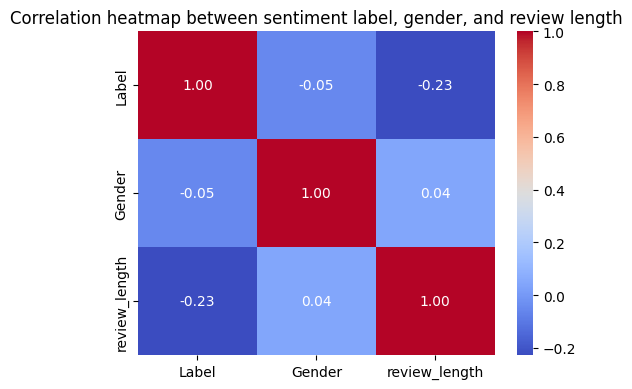

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:

# Remove duplicates and nulls if needed
df = df.drop_duplicates().dropna()

# Create review_length column if not already present
df['review_length'] = df['Comment'].astype(str).apply(lambda x: len(x.split()))

# Select relevant columns for correlation
corr_features = df[['Label', 'Gender', 'review_length']]

# Compute correlation matrix
corr_matrix = corr_features.corr()

# Plot and save heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation heatmap between sentiment label, gender, and review length')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

# To download the image within Colab:
from google.colab import files
files.download('correlation_heatmap.png')


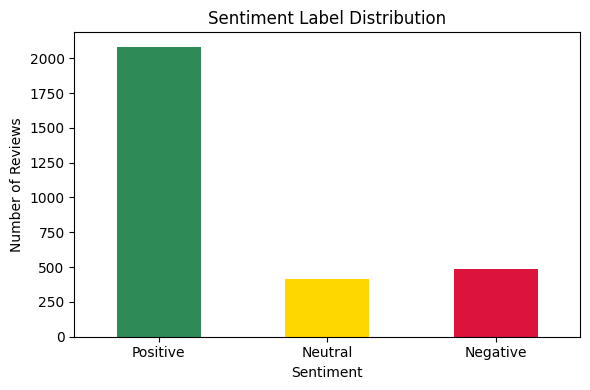

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
sent_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
df['Sentiment'] = df['Label'].map(sent_map)

plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().loc[['Positive','Neutral','Negative']].plot(
    kind='bar', color=['seagreen', 'gold', 'crimson'])
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('sentiment_bar.png')
plt.show()

# Download
from google.colab import files
files.download('sentiment_bar.png')

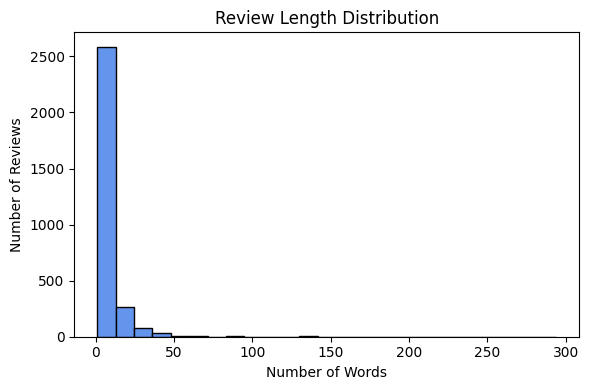

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
df['review_length'] = df['Comment'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(6,4))
plt.hist(df['review_length'], bins=25, color='cornflowerblue', edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.savefig('review_length_hist.png')
plt.show()

files.download('review_length_hist.png')

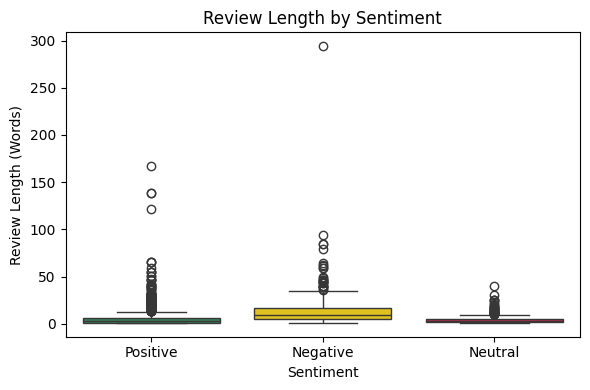

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
plt.figure(figsize=(6,4))

# FIX: Assign x to hue and set legend=False
sns.boxplot(
    x=df['Sentiment'],
    y=df['review_length'],
    hue=df['Sentiment'],  # Added this line
    palette=['seagreen','gold','crimson'],
    legend=False          # Added this line
)

plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length (Words)')
plt.tight_layout()
plt.savefig('reviewlength_by_sentiment_boxplot.png')
plt.show()

files.download('reviewlength_by_sentiment_boxplot.png') # Keep this if you are in a notebook environment

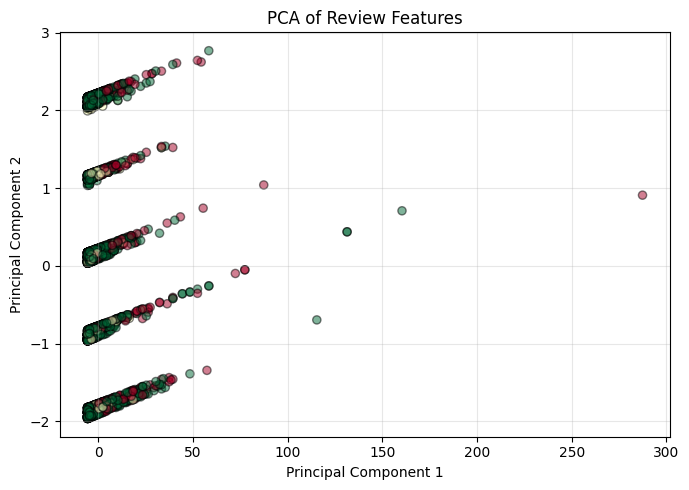

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Encode categorical variables
web_enc = LabelEncoder()
type_enc = LabelEncoder()
df['Website_enc'] = web_enc.fit_transform(df['Website'])
df['SeedType_enc'] = type_enc.fit_transform(df['Seed Type'])

# Features for PCA (excluding label/target for projection)
pca_features = df[['Gender', 'review_length', 'Website_enc', 'SeedType_enc']].copy()

# Fill any missing just in case
pca_features = pca_features.fillna(0)

# PCA projection
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_features.values)
sent_color = df['Label'].map({1:'seagreen', 0:'gold', -1:'crimson'}).values

plt.figure(figsize=(7,5))
plt.scatter(
    pca_result[:,0], pca_result[:,1],
    c=df['Label'], cmap='RdYlGn', alpha=0.5, edgecolor='k', s=35)
plt.title('PCA of Review Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_reviews.png')
plt.show()

files.download('pca_reviews.png')